# Scikit Learn

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]

In [3]:
X.shape

(506, 13)

In [4]:
#print(boston.DESCR)

## 2) separer le jeu d'apprentissage du jeu de test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
### exemple : Support Vector Machine

In [8]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, y, n_jobs=-1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.70641764,  0.31328628, -0.44688734])

## 5) aller au delà des paramètres par défaut avec un grid search

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.5491216893699401 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 5.1) affiner le grid search

In [11]:
def test_hyperparams(hyperparams):
    grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)

In [12]:
hyperparams = []
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
hyperparams.append(parameters)
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
hyperparams.append(parameters)
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]                }
hyperparams.append(parameters)
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
hyperparams.append(parameters)
parameters = {  'C'       : [7, 10, 15]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02, 0.03, 0.04],
                 "degree" : [1,2]}
hyperparams.append(parameters)
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
hyperparams.append(parameters)
parameters = {  'C'       : [30, 50, 100]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15, 0.5, 0.9, 1],
                 "degree" : [1,2]}
hyperparams.append(parameters)
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
hyperparams.append(parameters)

for hyperparam in hyperparams:
    test_hyperparams(hyperparam)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8704136535318469 SVR(C=200, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# 6) tester tous les algorithmes

In [13]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [14]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,VarianceThreshold

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> neighbors
KNeighborsClassifier,KNeighborsRegressor,KernelDensity,LSHForest,LocalOutlierFactor,NearestCentroid,NearestNeighbors,RadiusNeighborsClassifier,RadiusNeighborsRegressor

===> 

In [15]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [16]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object has no attribute 'score
Bayesian ARD regression.
0.6437940728171722
Bayesian ridge regression
0.6517234879211348
Linear regression with co
0.5663641990739314
Elastic Net model with it
0.645264491212928
Linear regression model t
0.6242524530540353
Least Angle Regressi

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
Algo de classification
Linear least squares with
0.6537416484209901
Ridge regression with bui
0.6497500986423177
Classifier using Ridge re
Algo de classification
Ridge classifier with bui
Algo de classification
Linear classifiers (SVM,
Algo de classification
Linear model fitted by mi
0.6214538980590008
Theil-Sen Estimator


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.4232708705185306
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Classifier implementing t
Algo de classification
Regression based on k-nea
0.746749277004313
Kernel Density Estimation
-2647.5289025386105
Performs approximate near
'LSHForest' object has no attribute 'score'
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
Algo de classification
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a
Algo de classification
Regression based on neigh
Input contains NaN, infinity or a value too large 
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Bin continuous data into
'KBinsDiscretizer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has n

/opt/conda/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the numb

In [17]:
best_algorithm

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
performances

{'Bayesian ARD regression.': [0.6437940728171722],
 'Bayesian ridge regression': [0.6517234879211348],
 'Linear regression with co': [0.5663641990739314],
 'Elastic Net model with it': [0.645264491212928],
 'Linear regression model t': [0.6242524530540353],
 'Least Angle Regression mo': [0.637425837972482],
 'Cross-validated Least Ang': [0.6311767055621907],
 'Linear Model trained with': [0.5667131768834335],
 'Lasso linear model with i': [0.6426140978616162],
 'Cross-validated Lasso, us': [0.6405663478633118],
 'Lasso model fit with Lars': [0.6467680668411132],
 'Ordinary least squar': [0.6542072191034475],
 'Orthogonal Matching Pursu': [0.45217842485062976],
 'Cross-validated Orthogona': [0.5927216927379578],
 'Passive Aggressive Regres': [0.585869559999176],
 'RANSAC (RANdom SAmple Con': [0.4653344060112059],
 'Linear least squares with': [0.6537416484209901],
 'Ridge regression with bui': [0.6497500986423177],
 'Linear model fitted by mi': [0.6214538980590008],
 'Theil-Sen Estimato

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(performances).T

In [21]:
col_name = "performance"
df.columns = [col_name]

In [22]:
df = df.sort_values(col_name)

In [23]:
df

,performance
Theil-Sen Estimator,0.423271
Orthogonal Matching Pursu,0.452178
RANSAC (RANdom SAmple Con,0.465334
Linear regression with co,0.566364
Linear Model trained with,0.566713
Nu Support Vector Regress,0.575927
Epsilon-Support Vector Re,0.585539
Passive Aggressive Regres,0.585870
Cross-validated Orthogona,0.592722
Linear Support Vector Reg,0.602618


In [24]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [25]:
df = df.drop("gains", axis=1)

In [26]:
df

,performance
Theil-Sen Estimator,0.423271
Orthogonal Matching Pursu,0.452178
RANSAC (RANdom SAmple Con,0.465334
Linear regression with co,0.566364
Linear Model trained with,0.566713
Nu Support Vector Regress,0.575927
Epsilon-Support Vector Re,0.585539
Passive Aggressive Regres,0.585870
Cross-validated Orthogona,0.592722
Linear Support Vector Reg,0.602618


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

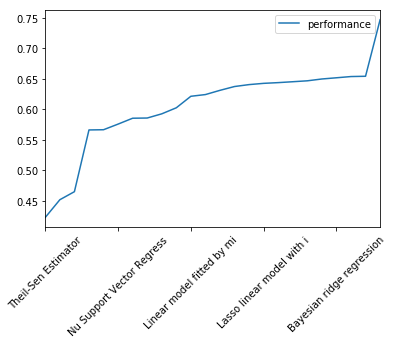

In [28]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

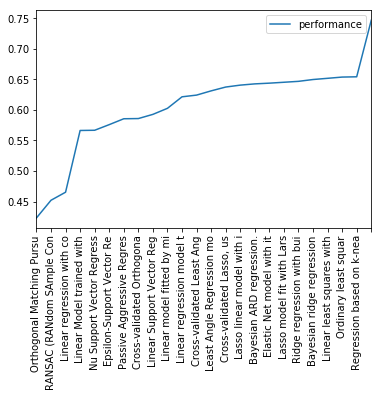

In [29]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

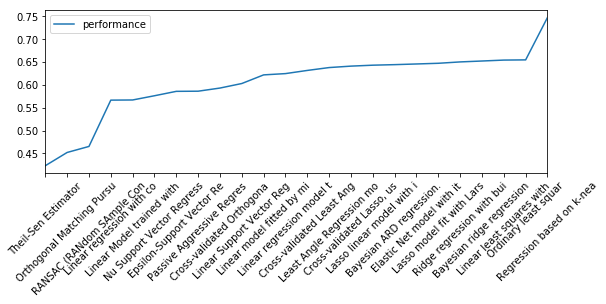

In [30]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


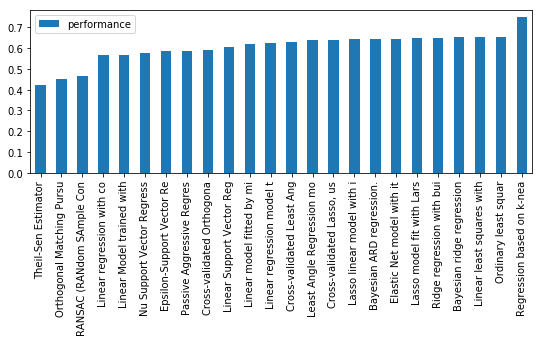

In [31]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

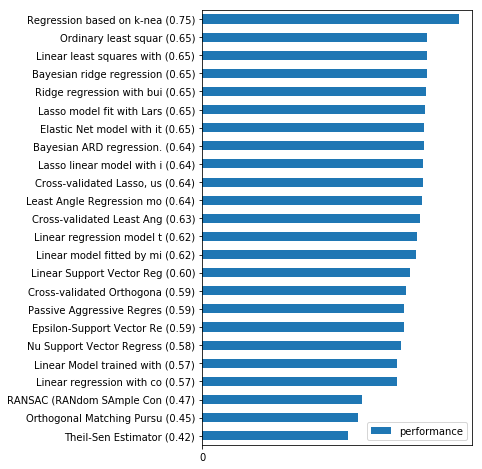

In [32]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

In [33]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [34]:
scoring_modules = get_sklearn_score_functions(False)

In [35]:
scoring_modules.keys()

dict_keys(['metrics', 'model_selection'])

In [36]:
scoring_modules["metrics"]

[<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>,
 <function sklearn.metrics.cluster.supervised.adjusted_mutual_info_score(labels_true, labels_pred, average_method='warn')>,
 <function sklearn.metrics.cluster.supervised.adjusted_rand_score(labels_true, labels_pred)>,
 <function sklearn.metrics.ranking.average_precision_score(y_true, y_score, average='macro', pos_label=1, sample_weight=None)>,
 <function sklearn.metrics.classification.balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)>,
 <function sklearn.metrics.classification.brier_score_loss(y_true, y_prob, sample_weight=None, pos_label=None)>,
 <function sklearn.metrics.cluster.unsupervised.calinski_harabaz_score(X, labels)>,
 <function sklearn.metrics.classification.cohen_kappa_score(y1, y2, labels=None, weights=None, sample_weight=None)>,
 <function sklearn.metrics.cluster.supervised.completeness_score(labels_true, labels_pred)>,
 <function sklea

# 8) tester les métriques sur un algo

In [37]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [38]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print (i, performance)
    performances[i] = [performance]

0 0.772684681935035
1 0.7458366225579294
2 0.7458811346439704
3 0.7841236684393373
4 0.7881658430214233
5 0.8063225152097637
6 0.7795265955097632
7 0.7650975719425764
8 0.7738865794774801
9 0.78091099972691


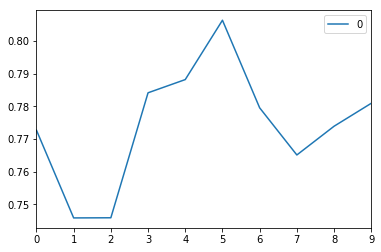

In [39]:
pd.DataFrame.from_dict(performances).T.plot()

In [40]:
y_pred            = algorithme.predict(X_test)

In [41]:
scoring_functions = get_sklearn_score_functions()
score_par_metric  = {}

for scoring_function in scoring_functions["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print (nom_metrique, " => ", score_algo)
    except:
        pass

adjusted_mutual_info_score  =>  -0.0003124432417037688
adjusted_rand_score  =>  -0.000418929329603241
completeness_score  =>  0.8994831567977046
explained_variance_score  =>  0.7809453898818627
fowlkes_mallows_score  =>  0.0
homogeneity_score  =>  0.9945933113483
mutual_info_score  =>  4.581148959698635
normalized_mutual_info_score  =>  0.945843502605717
r2_score  =>  0.7809109997269101
v_measure_score  =>  0.9446502783460899


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [42]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [43]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_rand_score,-0.000419
adjusted_mutual_info_score,-0.000312
fowlkes_mallows_score,0.000000
r2_score,0.780911
explained_variance_score,0.780945
completeness_score,0.899483
v_measure_score,0.944650
normalized_mutual_info_score,0.945844
homogeneity_score,0.994593
mutual_info_score,4.581149


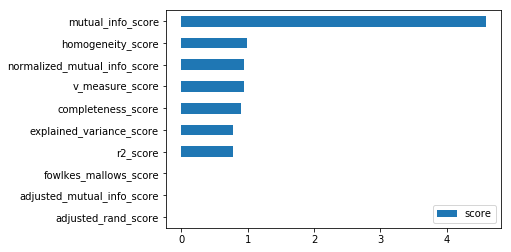

In [44]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée